<a href="https://colab.research.google.com/github/min346/DS-ASM/blob/min/DS_ASM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#df = pd.read_csv(r"C:\Users\minli\Downloads\heart_disease.csv") # Jupyter
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart_disease.csv") # Google Colab
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
# show number of rows and columns
df.shape

(10000, 21)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [ ]:
# show basic info (Non-Null Count means no of valid data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

**df.describe()**

count = no of valid values

mean = average of ALL values

In [ ]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [ ]:
# show total duplicated amount
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check amount of null data
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


# Data Visualization

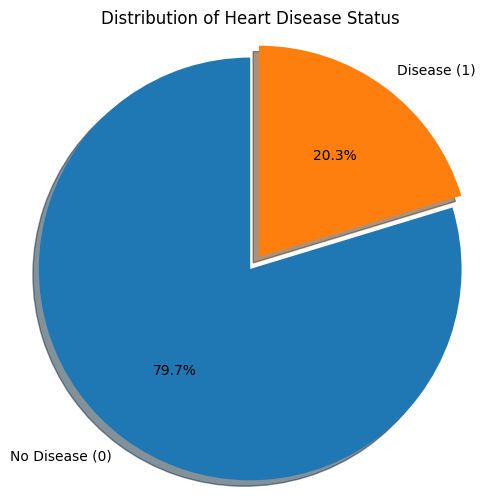

In [ ]:
# Count the number of each target class
target_counts = df['Heart Disease Status'].value_counts()

# Define labels for the pie chart
labels = ['No Disease (0)', 'Disease (1)']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.07, 0])
plt.title('Distribution of Heart Disease Status')
plt.axis('equal')
plt.show()

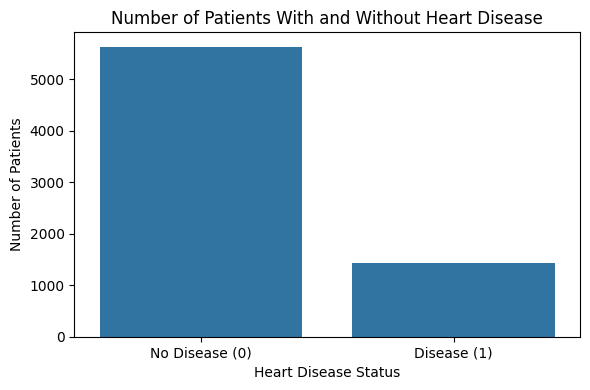

In [ ]:
# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)

# Add labels and title
plt.xlabel('Heart Disease Status')
plt.ylabel('Number of Patients')
plt.title('Number of Patients With and Without Heart Disease')
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
print(target_counts)

Heart Disease Status
No     5632
Yes    1435
Name: count, dtype: int64


# Data Preprocessing

## Missing Value

In [ ]:
# Check missing values
missing_values = df.isnull().sum()

In [ ]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Check the shape of the dataset before and after dropping
print("Original dataset shape:", df.shape)
print("After dropping missing values:", df_cleaned.shape)

Original dataset shape: (10000, 21)
After dropping missing values: (7067, 21)


In [ ]:
# Recheck for Missing Values
df_cleaned.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [ ]:
# Check total number of cells
total_cells = np.prod(df.shape)

# Count total missing values
total_missing = df.isnull().sum().sum()

# Calculate percentage of missing values
percent_missing = (total_missing / total_cells) * 100

print(f"Percentage of missing values in the dataset: {percent_missing:.2f}%")

Percentage of missing values in the dataset: 1.45%


In [ ]:
# Dataset overview
df.info()
print("Dataset shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

## Outlier

In [ ]:
# Select only numeric columns
numerical_columns = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
    'Triglyceride Level', 'Fasting Blood Sugar', 'Sleep Hours',
    'CRP Level', 'Homocysteine Level'
]

# Outlier detection using IQR for specified columns
outlier_summary = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_summary[col] = outlier_count

# Convert to DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print(outlier_df.sort_values(by='Outlier Count', ascending=False))

                     Outlier Count
Age                              0
Blood Pressure                   0
Cholesterol Level                0
BMI                              0
Triglyceride Level               0
Fasting Blood Sugar              0
Sleep Hours                      0
CRP Level                        0
Homocysteine Level               0


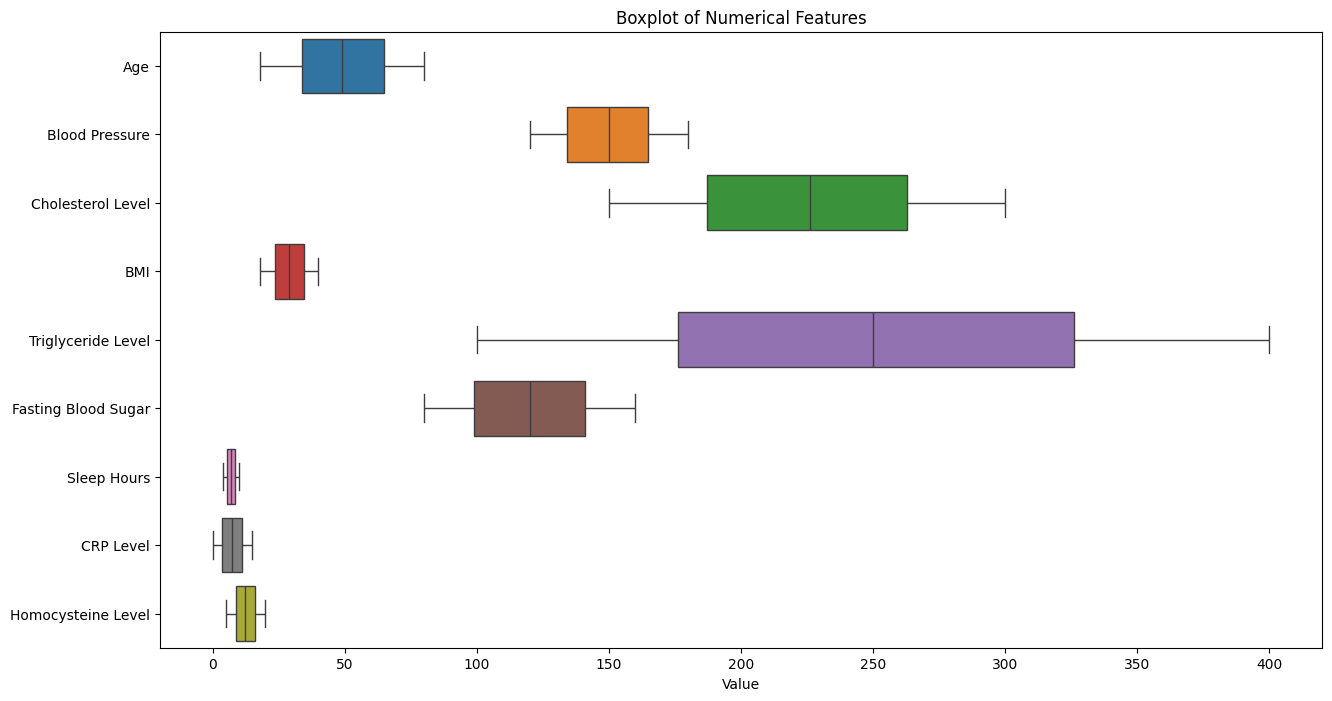

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title("Boxplot of Numerical Features")
plt.xlabel("Value")
plt.show()

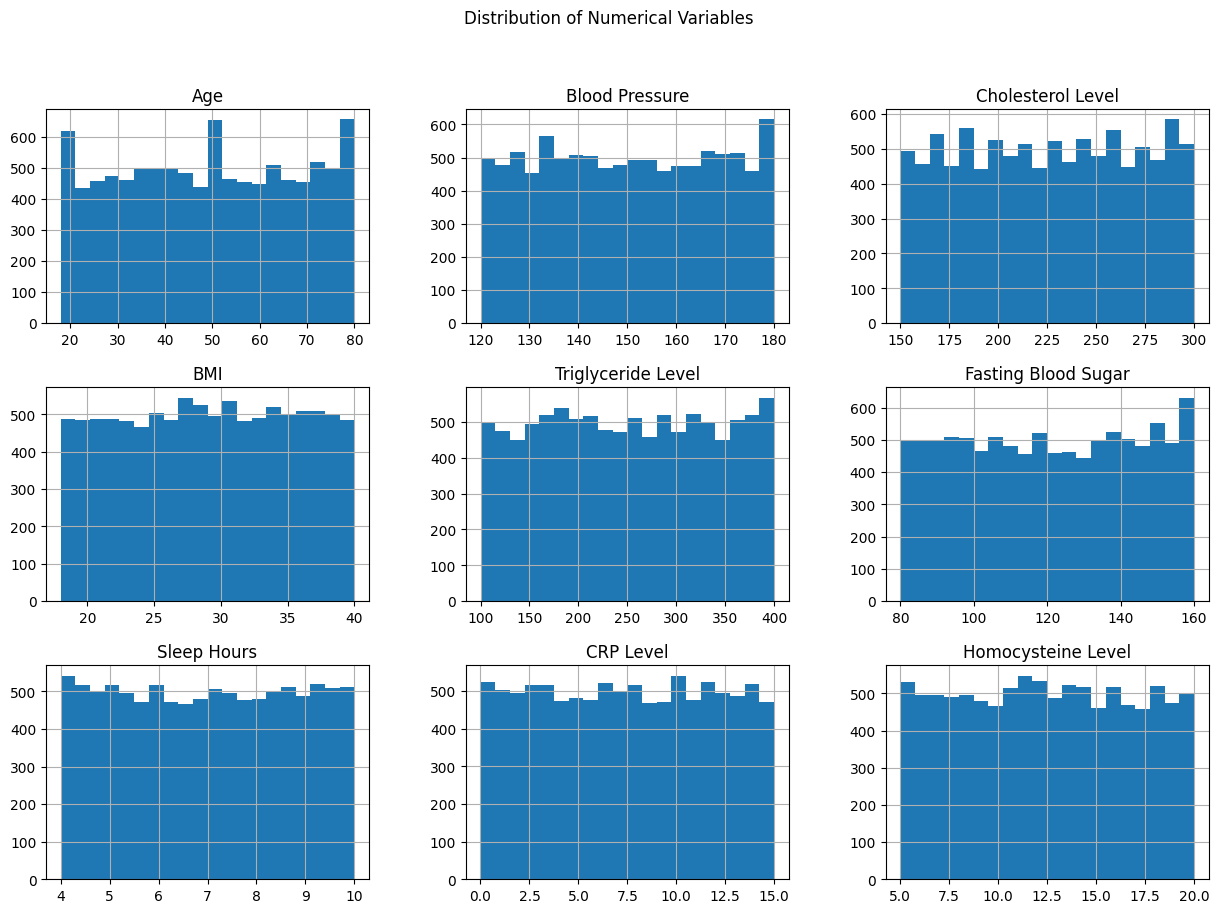

In [ ]:
df[numerical_columns].hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

## Data Encoding for Categorical Variables

In [ ]:
# Copy the cleaned data
df_encoded = df_cleaned.copy()

In [ ]:
# Label encode 4 ordinal columns
label_map = {'Low': 0, 'Medium': 1, 'High': 2}
label_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
for col in label_cols:
    df_encoded[col] = df_encoded[col].map(label_map)

In [ ]:
# One-Hot encode 7 binary columns
one_hot_cols = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

In [ ]:
# Convert boolean True/False to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [ ]:
# Encode target
df_encoded['Heart Disease Status'] = df_encoded['Heart Disease Status'].map({'Yes': 1, 'No': 0})

In [ ]:
df_encoded

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Heart Disease Status,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes
1,0.822581,0.433333,0.906667,2,0.328093,1,2,0.790657,1,0.110000,...,0.623548,0.953311,0,0,0,1,1,0,1,0
2,0.451613,0.100000,0.440000,0,0.538811,0,0,0.073314,0,0.976667,...,0.847382,0.415312,0,1,0,0,0,0,1,1
3,0.225806,0.033333,0.953333,2,0.278465,0,2,0.208156,2,0.643333,...,0.833981,0.063959,0,0,1,1,0,1,0,1
4,0.677419,0.766667,0.613333,0,0.112744,0,2,0.505116,2,0.543333,...,0.692001,0.210125,0,1,1,1,1,1,0,0
5,0.112903,0.533333,0.713333,0,0.461013,0,1,0.250739,0,0.086667,...,0.286057,0.387642,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.806452,0.816667,0.940000,1,0.219767,1,0,0.342855,2,0.663333,...,0.220894,0.460611,1,0,1,0,0,0,1,0
9994,0.887097,0.400000,0.273333,1,0.975565,1,0,0.591482,1,0.333333,...,0.076357,0.201312,1,0,1,1,1,0,0,0
9995,0.112903,0.266667,0.620000,1,0.035550,1,2,0.472443,1,0.810000,...,0.238763,0.942183,1,0,1,0,0,1,0,1
9998,0.080645,0.366667,0.993333,0,0.771125,1,2,0.754369,1,0.043333,...,0.480769,0.458160,1,1,1,0,1,1,0,1


## Normalization

In [ ]:
# List of columns to normalize
cols_to_normalize = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI','Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

In [ ]:
# Apply normalization
scaler = MinMaxScaler()
df_encoded[cols_to_normalize] = scaler.fit_transform(df_encoded[cols_to_normalize])

In [ ]:
df_encoded

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Heart Disease Status,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes
1,0.822581,0.433333,0.906667,2,0.328093,1,2,0.790657,1,0.110000,...,0.623548,0.953311,0,0,0,1,1,0,1,0
2,0.451613,0.100000,0.440000,0,0.538811,0,0,0.073314,0,0.976667,...,0.847382,0.415312,0,1,0,0,0,0,1,1
3,0.225806,0.033333,0.953333,2,0.278465,0,2,0.208156,2,0.643333,...,0.833981,0.063959,0,0,1,1,0,1,0,1
4,0.677419,0.766667,0.613333,0,0.112744,0,2,0.505116,2,0.543333,...,0.692001,0.210125,0,1,1,1,1,1,0,0
5,0.112903,0.533333,0.713333,0,0.461013,0,1,0.250739,0,0.086667,...,0.286057,0.387642,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.806452,0.816667,0.940000,1,0.219767,1,0,0.342855,2,0.663333,...,0.220894,0.460611,1,0,1,0,0,0,1,0
9994,0.887097,0.400000,0.273333,1,0.975565,1,0,0.591482,1,0.333333,...,0.076357,0.201312,1,0,1,1,1,0,0,0
9995,0.112903,0.266667,0.620000,1,0.035550,1,2,0.472443,1,0.810000,...,0.238763,0.942183,1,0,1,0,0,1,0,1
9998,0.080645,0.366667,0.993333,0,0.771125,1,2,0.754369,1,0.043333,...,0.480769,0.458160,1,1,1,0,1,1,0,1


## Balanced Data

In [ ]:
# balanced data
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('Heart Disease Status', axis=1)
y = df_encoded['Heart Disease Status']

smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Heart Disease Status'] = y_resampled

In [ ]:
resampled_df

,Age,Blood Pressure,Cholesterol Level,Exercise Habits,BMI,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,...,CRP Level,Homocysteine Level,Gender_Male,Smoking_Yes,Family Heart Disease_Yes,Diabetes_Yes,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Heart Disease Status
0,0.822581,0.433333,0.906667,2,0.328093,1,2,0.790657,1,0.110000,...,0.623548,0.953311,0,0,1,1,0,1,0,0
1,0.451613,0.100000,0.440000,0,0.538811,0,0,0.073314,0,0.976667,...,0.847382,0.415312,1,0,0,0,0,1,1,0
2,0.225806,0.033333,0.953333,2,0.278465,0,2,0.208156,2,0.643333,...,0.833981,0.063959,0,1,1,0,1,0,1,0
3,0.677419,0.766667,0.613333,0,0.112744,0,2,0.505116,2,0.543333,...,0.692001,0.210125,1,1,1,1,1,0,0,0
4,0.112903,0.533333,0.713333,0,0.461013,0,1,0.250739,0,0.086667,...,0.286057,0.387642,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,0.775155,0.234079,0.149691,2,0.700224,1,0,0.900018,0,0.306986,...,0.669218,0.425196,1,1,1,1,1,0,1,1
10133,0.535666,0.850000,0.692181,0,0.919929,1,2,0.822002,0,0.691485,...,0.316111,0.341611,0,0,1,1,1,0,0,1
10134,0.700382,0.259037,0.615200,2,0.427861,1,0,0.504231,2,0.521891,...,0.311117,0.099722,0,0,1,0,1,1,1,1
10135,0.378853,0.066914,0.585979,2,0.433498,0,2,0.677591,0,0.321998,...,0.248322,0.284995,1,0,1,1,0,1,1,1


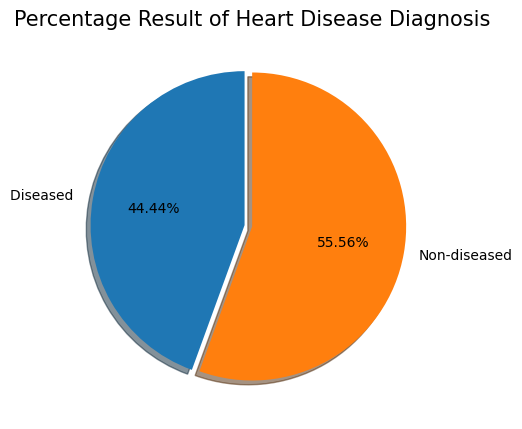

In [ ]:
plt.figure(figsize=(5,5))
disease = len(resampled_df[resampled_df['Heart Disease Status'] == 1])
non_disease = len(resampled_df[resampled_df['Heart Disease Status'] == 0])
plt.title("Percentage Result of Heart Disease Diagnosis",fontsize = 15)
plt.pie(x=[disease, non_disease], explode=[0.05, 0], labels=['Diseased ', 'Non-diseased'], autopct='%1.2f%%', shadow=True, startangle = 90)
plt.show()

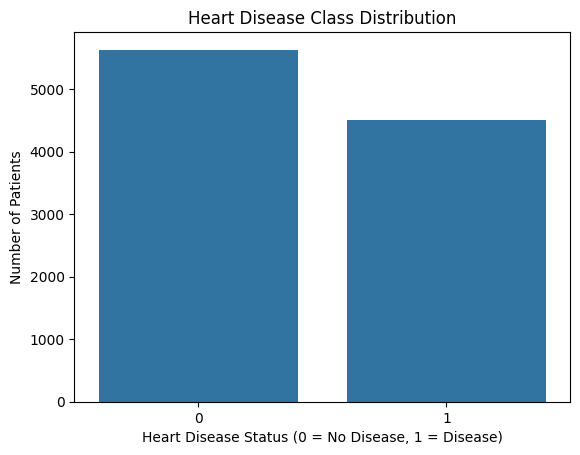

In [ ]:
sns.countplot(x='Heart Disease Status', data=resampled_df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease Status (0 = No Disease, 1 = Disease)')
plt.ylabel('Number of Patients')
plt.show()

In [1]:
sns.countplot(x='Heart Disease Status', data=resampled_df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease Status (0 = No Disease, 1 = Disease)')
plt.ylabel('Number of Patients')
plt.show()

NameError: name 'sns' is not defined